MapReduce data analysis fof credit card fraud anomaly detection using python on a Jupyter Notebook, big data final project , coding provided by Anthony Chiam 21100276

*Step 1. Check on available data on the dataset*

In [32]:
import pandas as pd

# Load your CSV
df = pd.read_csv(r'C:\Users\Anthony\iCloudDrive\Degree subjects\SEM8\big data\data.csv')
df.head(10)  # Display the first 10 rows
# Count rows
row_count = len(df)
print("Number of rows:", row_count)

# Or alternative:
print("Number of rows:", df.shape[0])
df.head(5)  # Display the first 5 rows

Number of rows: 8580255
Number of rows: 8580255


,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,name
0,024-79-2449,30417925130692,Felicia,Gomez,F,486 Benson Stravenue,Rockford,IL,61107,42.2786,...,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14,Felicia Gomez
1,269-54-1394,4224979584238239,Jeffrey,Mathews,M,5430 Leslie Flat Suite 854,Ceres,CA,95307,37.5833,...,77.27,8.06,3243.55,51496.77,1093950.50,3,10,11,28,Jeffrey Mathews
2,527-16-1817,4056555304074394,Christina,Ellis,F,75933 Harvey Via Apt. 423,Buffalo,NY,14224,42.8371,...,67.47,43.41,4242.22,26384.49,1005859.33,6,14,23,48,Christina Ellis
3,314-98-4472,6011544296258081,Steven,Murphy,M,268 Anderson Valley Apt. 958,Mansfield Center,CT,6250,41.7698,...,58.22,52.05,4303.16,3476.36,226662.34,3,11,14,14,Steven Murphy
4,390-83-9961,374917808855764,Cynthia,Martinez,F,53164 Deborah Square Apt. 739,Anaheim,CA,92804,33.8186,...,44.64,24.65,2424.13,32215.14,36989.60,2,13,16,20,Cynthia Martinez


*Step 2. Perform data cleaning*

In [ ]:
import pandas as pd

# Load your large dataset (example: from a CSV file), note must use the original uncorrected file from kaggle, or else it will not work
df = pd.read_csv(r'C:\Users\Anthony\iCloudDrive\Degree subjects\SEM8\big data\data.csv')

# Merge columns
df['name'] = df['first'].fillna('') + ' ' + df['last'].fillna('')
# Save changes (overwrite the original file)
df.to_csv(r'C:\Users\Anthony\iCloudDrive\Degree subjects\SEM8\big data\data.csv', index=False)
df.head(5)  # Display the first 5 rows to verify the merge
print("File saved with 'name' column.")

File saved with 'name' column.


In [33]:
df.head(5)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,name
0,024-79-2449,30417925130692,Felicia,Gomez,F,486 Benson Stravenue,Rockford,IL,61107,42.2786,...,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14,Felicia Gomez
1,269-54-1394,4224979584238239,Jeffrey,Mathews,M,5430 Leslie Flat Suite 854,Ceres,CA,95307,37.5833,...,77.27,8.06,3243.55,51496.77,1093950.50,3,10,11,28,Jeffrey Mathews
2,527-16-1817,4056555304074394,Christina,Ellis,F,75933 Harvey Via Apt. 423,Buffalo,NY,14224,42.8371,...,67.47,43.41,4242.22,26384.49,1005859.33,6,14,23,48,Christina Ellis
3,314-98-4472,6011544296258081,Steven,Murphy,M,268 Anderson Valley Apt. 958,Mansfield Center,CT,6250,41.7698,...,58.22,52.05,4303.16,3476.36,226662.34,3,11,14,14,Steven Murphy
4,390-83-9961,374917808855764,Cynthia,Martinez,F,53164 Deborah Square Apt. 739,Anaheim,CA,92804,33.8186,...,44.64,24.65,2424.13,32215.14,36989.60,2,13,16,20,Cynthia Martinez


*3. Perform MapReduce operations to analyse then download results to a CSV file*

In [ ]:
#note to anybody who wants to run this code, you need to change the file path to your own file path lcoation yaa, I will attach the file fyr
#andddd its gonna take some time, depends on comp performance

#step 1 imports & config
import pandas as pd
import numpy as np
from pathlib import Path
# Load your large dataset (example: from a CSV file)
df = pd.read_csv(r'C:\Users\Anthony\iCloudDrive\Degree subjects\SEM8\big data\data.csv') 


# === CONFIG ===
file_path = r"C:\Users\Anthony\iCloudDrive\Degree subjects\SEM8\big data\data.csv"
chunksize = 200_000            # adjust up/down depending on RAM and speed
zscore_threshold = 3.0         # per-field anomaly if |z| > this
combined_threshold = 6.0       # combined score threshold (sum of abs z-scores)
# ==============

# step 2 - columns (must match your CSV headers exactly)
columns_needed = [
    "name",
    "customer_avg_amout_1_day",       # note spelling kept as you provided
    "customer_avg_amount_7_day",
    "customer_avg_amount_30_day",
    "merchant_num_trans_1_day",
    "merchant_num_trans_7_day",
    "merchant_num_trans_30_day",
    "merchant_risk_1_day",
    "merchant_risk_7_day",
    "merchant_risk_30_day",
    "merchant_risk_90_day"
]

# *Quick check* - read header only to ensure columns exist
header = pd.read_csv(file_path, nrows=0).columns.tolist()
missing = [c for c in columns_needed if c not in header]
if missing:
    raise ValueError(f"The following required columns are missing from CSV header: {missing}")

num_metrics = len(columns_needed) - 1  # excluding 'name'
print(f"All required columns present. Metrics count per row: {num_metrics}")



# step 3 - Map & Reduce: aggregate sums and counts per name
# aggregator: name -> {'sums': np.array, 'counts': np.array}
aggregator = {}

num_rows_processed = 0
usecols = columns_needed  #  only 2 read relevant columns

for chunk in pd.read_csv(file_path, usecols=usecols, chunksize=chunksize, low_memory=True):
    num_rows_processed += len(chunk)

    # Convert metric columns to numeric, keep NaNs
    metric_cols = columns_needed[1:]
    chunk[metric_cols] = chunk[metric_cols].apply(pd.to_numeric, errors='coerce')
    
    # Group by name and aggregate sums and counts (non-null counts)
    grouped = chunk.groupby("name")[metric_cols].agg(['sum', 'count'])
    # grouped columns are MultiIndex: (metric, 'sum') and (metric, 'count')
    
    for name, row in grouped.iterrows():
        # extract sums and counts arrays in consistent order
        sums = np.array([row[(col, 'sum')] for col in metric_cols], dtype=float)
        counts = np.array([row[(col, 'count')] for col in metric_cols], dtype=float)
        
        if name in aggregator:
            aggregator[name]['sums'] += sums
            aggregator[name]['counts'] += counts
        else:
            aggregator[name] = {'sums': sums.copy(), 'counts': counts.copy()}
    
    print(f"Processed rows: {num_rows_processed}", end='\r')

print(f"\nDone reading file. Total rows processed: {num_rows_processed}")
print(f"Unique names aggregated: {len(aggregator)}")



# step 4 compute averages per customer (column renamed to name from the start)
rows = []
metric_cols = columns_needed[1:]

for name, stats in aggregator.items():
    sums = stats['sums']
    counts = stats['counts']
    # avoid division by zero: where count==0 -> result = NaN
    avgs = np.where(counts > 0, sums / counts, np.nan)
    rows.append((name, *avgs.tolist()))

df_avgs = pd.DataFrame(rows, columns=["name"] + metric_cols)
df_avgs.reset_index(drop=True, inplace=True)
df_avgs.head()



# step 5 calc z-scores & anomaly flags
df = df_avgs.copy()

# compute mean & std per metric (ignoring NaN)
means = df[metric_cols].mean(skipna=True)
stds  = df[metric_cols].std(skipna=True, ddof=0)   # population std

# compute z-scores dataframe (NaNs remain)
z_df = (df[metric_cols] - means) / stds

# absolute z-scores
abs_z = z_df.abs()

# per-field flags
per_field_flag = (abs_z > zscore_threshold)

# combined score (sum of abs z across metrics, ignoring NaNs as zeros)
combined_score = abs_z.fillna(0).sum(axis=1)

# final anomaly boolean
df['combined_anomaly_score'] = combined_score
df['per_field_anomaly'] = per_field_flag.any(axis=1)
df['combined_anomaly'] = df['combined_anomaly_score'] > combined_threshold
df['is_anomaly'] = df['per_field_anomaly'] | df['combined_anomaly']

# attach a sample of z scores (optional)
for col in metric_cols:
    df[f"{col}_z"] = z_df[col]

# Show anomalies
anomalies = df[df['is_anomaly']].sort_values('combined_anomaly_score', ascending=False)
print(f"Found {len(anomalies)} anomalous customers (based on thresholds).")
anomalies.head(50)


# step 6 - save anomaly result and full per-customer stats
out_dir = Path("anomaly_results")
out_dir.mkdir(exist_ok=True)

anomalies.to_csv(out_dir / "anomalies_by_name.csv", index=False)
df.to_csv(out_dir / "per_customer_averages_and_zscores.csv", index=False)

print("Saved outputs to ./anomaly_results/")


All required columns present. Metrics count per row: 10
Processed rows: 8580255
Done reading file. Total rows processed: 8580255
Unique names aggregated: 9331
Found 1173 anomalous customers (based on thresholds).
Saved outputs to ./anomaly_results/


4. must install matplotlib if your running on VSCode or PyCharm or anyIDE except for colab (if have can skip la)

In [16]:
pip install matplotlib seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 5.9 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 6.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.1 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.3 MB 6.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.8/2.3 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.3 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.3 MB 3.9 MB/s eta 0:00:01
   --------------------------

5. Generate Results and Output of analysis from MapReduce

 *note: this step is actually a debugging step where i check for any errors* ||
4 full code & results skip to **6** 

In [ ]:
# step 1 - load files and basic setup
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)

RESULT_DIR = Path("anomaly_results")
perc_path = RESULT_DIR / "per_customer_averages_and_zscores.csv"
anom_path = RESULT_DIR / "anomalies_by_name.csv"

# load (try both files; if missing, adjust names)
df_all = pd.read_csv(perc_path)     # full per-customer stats + z-scores
df_pre_anom = pd.read_csv(anom_path) if anom_path.exists() else None

print("Loaded per-customer file:", perc_path.exists(), "rows:", len(df_all))
print("Loaded pre-filtered anomalies:", anom_path.exists(), "rows:",
      len(df_pre_anom) if df_pre_anom is not None else 0)

df_all.head()


Loaded per-customer file: True rows: 9331
Loaded pre-filtered anomalies: True rows: 1173


,name,customer_avg_amout_1_day,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,...,customer_avg_amout_1_day_z,customer_avg_amount_7_day_z,customer_avg_amount_30_day_z,merchant_num_trans_1_day_z,merchant_num_trans_7_day_z,merchant_num_trans_30_day_z,merchant_risk_1_day_z,merchant_risk_7_day_z,merchant_risk_30_day_z,merchant_risk_90_day_z
0,Aaron Bean,45.360658,45.803145,35.957595,2546.954077,50404.564285,550961.949058,3.558904,9.135890,16.133699,...,-0.027051,0.084567,0.178825,-0.022095,-0.031682,-0.104335,0.210849,-0.250997,-0.001951,-0.025771
1,Aaron Beard,45.032692,45.883604,35.023038,2631.143613,50461.961195,543616.426460,3.498175,9.188869,15.933394,...,-0.127737,0.110620,-0.211026,0.457240,-0.014909,-0.296694,-0.005805,-0.135506,-0.350578,-0.304258
2,Aaron Briggs,43.119318,45.136927,35.785736,2573.380409,51447.321009,562866.799682,3.619091,9.294545,15.942727,...,-0.715150,-0.131153,0.107134,0.128364,0.273043,0.207421,0.425569,0.094866,-0.334334,0.088799
3,Aaron Cameron,45.247552,44.106854,35.602511,2511.681097,50370.606646,560608.275005,3.420671,9.194923,16.349955,...,-0.061774,-0.464688,0.030702,-0.222923,-0.041606,0.148277,-0.282306,-0.122308,0.374439,-0.160401
4,Aaron Campbell,44.652311,45.385187,34.601460,2644.507091,51113.147689,555864.215280,3.520856,9.232711,16.051592,...,-0.244516,-0.050767,-0.386888,0.533325,0.175388,0.024042,0.075111,-0.039930,-0.144857,0.299237


In [ ]:
# step 2 - detect metric cols and z-score cols; recompute if needed
# (this makes the following steps robust even if column names differ slightly)

all_cols = df_all.columns.tolist()

# metric columns expected (from your schema)
metric_cols = [
    "customer_avg_amout_1_day",
    "customer_avg_amount_7_day",
    "customer_avg_amount_30_day",
    "merchant_num_trans_1_day",
    "merchant_num_trans_7_day",
    "merchant_num_trans_30_day",
    "merchant_risk_1_day",
    "merchant_risk_7_day",
    "merchant_risk_30_day",
    "merchant_risk_90_day"
]

# keep only those actually present
metric_cols = [c for c in metric_cols if c in all_cols]
if not metric_cols:
    raise ValueError("No expected metric columns found in per_customer file. Check headers.")

# find z columns (pattern: metric + '_z') if they exist
z_cols = [f"{c}_z" for c in metric_cols if f"{c}_z" in all_cols]

# if z_cols missing, recompute z-scores from metrics
if not z_cols:
    means = df_all[metric_cols].mean()
    stds  = df_all[metric_cols].std(ddof=0)
    z_df = (df_all[metric_cols] - means) / stds
    for col in metric_cols:
        df_all[f"{col}_z"] = z_df[col]
    z_cols = [f"{c}_z" for c in metric_cols]

print("Metrics:", metric_cols)
print("Z-score columns:", z_cols)


Metrics: ['customer_avg_amout_1_day', 'customer_avg_amount_7_day', 'customer_avg_amount_30_day', 'merchant_num_trans_1_day', 'merchant_num_trans_7_day', 'merchant_num_trans_30_day', 'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day']
Z-score columns: ['customer_avg_amout_1_day_z', 'customer_avg_amount_7_day_z', 'customer_avg_amount_30_day_z', 'merchant_num_trans_1_day_z', 'merchant_num_trans_7_day_z', 'merchant_num_trans_30_day_z', 'merchant_risk_1_day_z', 'merchant_risk_7_day_z', 'merchant_risk_30_day_z', 'merchant_risk_90_day_z']


In [ ]:
# step 3 find per-field anomalies
z_threshold = 3.0   # tuneable

per_field_anoms = {}
for m, zc in zip(metric_cols, z_cols):
    # sort by absolute z desc
    temp = df_all[[ "name", m, zc]].copy()
    temp['abs_z'] = temp[zc].abs()
    temp_sorted = temp.sort_values('abs_z', ascending=False)
    count_flagged = (temp['abs_z'] > z_threshold).sum()
    per_field_anoms[m] = {
        'count_flagged': int(count_flagged),
        'top_10': temp_sorted.head(10).reset_index(drop=True)
    }

# print summary counts
for m, info in per_field_anoms.items():
    print(f"{m}: flagged={info['count_flagged']}  (top example below)")
    display(info['top_10'])
    print("-"*60)


customer_avg_amout_1_day: flagged=304  (top example below)


,name,customer_avg_amout_1_day,customer_avg_amout_1_day_z,abs_z
0,Willie Stein,75.990000,9.376263,9.376263
1,Ashley Campbell,74.231429,8.836376,8.836376
2,Stephen Owen,19.012222,-8.116111,8.116111
3,Cindy Bell,19.188889,-8.061874,8.061874
4,Travis Graham,20.312500,-7.716922,7.716922
5,Amber Irwin,70.250000,7.614063,7.614063
6,Timothy Bell,70.101667,7.568525,7.568525
7,Daniel Peterson,20.797500,-7.568025,7.568025
8,Shannon Mason,20.985385,-7.510344,7.510344
9,Kelly Price,69.373636,7.345017,7.345017


------------------------------------------------------------
customer_avg_amount_7_day: flagged=326  (top example below)


,name,customer_avg_amount_7_day,customer_avg_amount_7_day_z,abs_z
0,Brittany Hutchinson,72.001667,8.567588,8.567588
1,Micheal Maxwell,69.746000,7.837208,7.837208
2,Kurt Ross,21.410000,-7.813877,7.813877
3,Julia Burke,21.858750,-7.668572,7.668572
4,Jacob Moore,69.201429,7.660877,7.660877
5,Michele Whitaker,68.960000,7.582703,7.582703
6,Christopher Watts,22.280000,-7.532173,7.532173
7,Carmen Cowan,23.157143,-7.248156,7.248156
8,Cheyenne Kaiser,23.747143,-7.057115,7.057115
9,Stacy Johnson,67.292222,7.042681,7.042681


------------------------------------------------------------
customer_avg_amount_30_day: flagged=314  (top example below)


,name,customer_avg_amount_30_day,customer_avg_amount_30_day_z,abs_z
0,Kimberly Warner,14.518571,-8.764490,8.764490
1,Julie Schultz,55.949286,8.518384,8.518384
2,Meghan Todd,55.662222,8.398635,8.398635
3,Richard Weeks,15.895000,-8.190311,8.190311
4,Catherine Hawkins,55.131000,8.177035,8.177035
5,Crystal Madden,55.020000,8.130731,8.130731
6,Joshua Mccormick,16.837143,-7.797295,7.797295
7,Chelsey Day,17.600000,-7.479068,7.479068
8,Devin Schmidt,53.230000,7.384030,7.384030
9,Nathaniel Guzman,18.325556,-7.176402,7.176402


------------------------------------------------------------
merchant_num_trans_1_day: flagged=325  (top example below)


,name,merchant_num_trans_1_day,merchant_num_trans_1_day_z,abs_z
0,Crystal Lewis,1059.012500,-8.493725,8.493725
1,Nathaniel Guzman,3944.423333,7.934428,7.934428
2,Bethany Johnson,3922.961429,7.812234,7.812234
3,Casey Hayden,3892.135556,7.636726,7.636726
4,Thomas Cunningham,1241.516000,-7.454637,7.454637
5,Maria Johnson,3840.706667,7.343914,7.343914
6,Nicole Silva,3804.645000,7.138597,7.138597
7,Gerald Blevins,3772.074286,6.953154,6.953154
8,Elizabeth Fischer,3763.653636,6.905211,6.905211
9,Megan Goodman,3753.571000,6.847806,6.847806


------------------------------------------------------------
merchant_num_trans_7_day: flagged=319  (top example below)


,name,merchant_num_trans_7_day,merchant_num_trans_7_day_z,abs_z
0,Madeline Cruz,80739.657778,8.833156,8.833156
1,Anna Scott,21487.692857,-8.482073,8.482073
2,Justin Gates,79041.971429,8.337041,8.337041
3,Christopher Holmes,22501.891429,-8.185693,8.185693
4,David Haynes,76131.165000,7.486414,7.486414
5,Anthony Fisher,24924.841111,-7.477633,7.477633
6,Taylor French,25502.243750,-7.308899,7.308899
7,Jerome Stewart,25566.639091,-7.290081,7.290081
8,Linda Navarro,26123.667500,-7.127300,7.127300
9,Sophia Montoya,74526.587273,7.017508,7.017508


------------------------------------------------------------
merchant_num_trans_30_day: flagged=307  (top example below)


,name,merchant_num_trans_30_day,merchant_num_trans_30_day_z,abs_z
0,David Haynes,229474.413000,-8.523226,8.523226
1,William Torres,238816.202500,-8.278590,8.278590
2,Cody Cruz,253600.696250,-7.891424,7.891424
3,Jennifer Case,851695.155714,7.771057,7.771057
4,Yolanda Wilson,259829.735714,-7.728302,7.728302
5,Danielle Kelley,844163.507500,7.573823,7.573823
6,Shannon Bowman,843835.342222,7.565230,7.565230
7,Mark Whitehead,268333.747778,-7.505605,7.505605
8,Brandon Fernandez,274448.820000,-7.345468,7.345468
9,Steven Buchanan,276680.415000,-7.287028,7.287028


------------------------------------------------------------
merchant_risk_1_day: flagged=322  (top example below)


,name,merchant_risk_1_day,merchant_risk_1_day_z,abs_z
0,Jennifer Martinez,1.300000,-7.847919,7.847919
1,Brian Sanders,5.666667,7.730411,7.730411
2,Austin Hale,5.666667,7.730411,7.730411
3,Denise Kelley,1.333333,-7.729000,7.729000
4,Bianca Williams,5.636364,7.622303,7.622303
5,Brittany Hutchinson,5.583333,7.433114,7.433114
6,Kelsey Reed,1.500000,-7.134408,7.134408
7,Brooke Villanueva,5.428571,6.880993,6.880993
8,Jerry Miller,5.428571,6.880993,6.880993
9,Jordan Martin,1.571429,-6.879582,6.879582


------------------------------------------------------------
merchant_risk_7_day: flagged=306  (top example below)


,name,merchant_risk_7_day,merchant_risk_7_day_z,abs_z
0,Justin Gates,4.714286,-9.889976,9.889976
1,Jerry Miller,13.285714,8.795507,8.795507
2,Susan Clark,5.571429,-8.021428,8.021428
3,Charles May,12.909091,7.974478,7.974478
4,Anna Scott,5.714286,-7.710003,7.710003
5,Steven Ryan,5.714286,-7.710003,7.710003
6,Joel Hernandez,12.777778,7.688219,7.688219
7,Samantha Williamson,5.727273,-7.681692,7.681692
8,Ronald Alvarado,5.727273,-7.681692,7.681692
9,Nicole Oconnor,5.750000,-7.632147,7.632147


------------------------------------------------------------
merchant_risk_30_day: flagged=317  (top example below)


,name,merchant_risk_30_day,merchant_risk_30_day_z,abs_z
0,Stacie Andrews,21.714286,9.710980,9.710980
1,Daniel Clay,11.125000,-8.719518,8.719518
2,Crystal Lewis,11.250000,-8.501958,8.501958
3,Michelle Taylor,20.714286,7.970494,7.970494
4,Meghan Hall,20.625000,7.815094,7.815094
5,Linda Short,11.714286,-7.693875,7.693875
6,John Reilly,11.750000,-7.631715,7.631715
7,Bradley Horn,20.444444,7.500839,7.500839
8,Rhonda Johnson,11.857143,-7.445234,7.445234
9,Gerald Blevins,11.857143,-7.445234,7.445234


------------------------------------------------------------
merchant_risk_90_day: flagged=331  (top example below)


,name,merchant_risk_90_day,merchant_risk_90_day_z,abs_z
0,Alexa Robinson,14.857143,-10.062637,10.062637
1,Anthony Nelson,41.857143,8.341406,8.341406
2,Elizabeth Hamilton,41.454545,8.066983,8.066983
3,Taylor Higgins,41.125000,7.842354,7.842354
4,Sandra Hobbs,41.111111,7.832887,7.832887
5,Tara Willis,41.000000,7.757150,7.757150
6,Ann Fuller,40.857143,7.659774,7.659774
7,Deborah Wood,18.583333,-7.522749,7.522749
8,Kristine Walsh,40.428571,7.367647,7.367647
9,Kimberly Warner,19.142857,-7.141360,7.141360


------------------------------------------------------------


In [ ]:
# step 4 find combined anomaly score
abs_z_cols = [f"{c}_z" for c in metric_cols]
df_all['combined_abs_z'] = df_all[abs_z_cols].abs().fillna(0).sum(axis=1)

# mark anomalies by either per-field or combined threshold
per_field_any = df_all[[f"{c}_z" for c in metric_cols]].abs().gt(z_threshold).any(axis=1)
combined_threshold = 6.0  # tuneable
combined_flag = df_all['combined_abs_z'] > combined_threshold

df_all['flag_per_field'] = per_field_any
df_all['flag_combined'] = combined_flag
df_all['is_anomaly'] = df_all['flag_per_field'] | df_all['flag_combined']

# summary
print("Total customers:", len(df_all))
print("Flagged by any single field:", int(per_field_any.sum()))
print("Flagged by combined score:", int(combined_flag.sum()))
print("Total flagged (union):", int(df_all['is_anomaly'].sum()))

# show top anomalies by combined score
top_overall = df_all.sort_values('combined_abs_z', ascending=False).head(30)
top_overall[['name','combined_abs_z','flag_per_field','flag_combined'] + metric_cols].head(20)


Total customers: 9331
Flagged by any single field: 1105
Flagged by combined score: 1173
Total flagged (union): 1173


,name,combined_abs_z,flag_per_field,flag_combined,customer_avg_amout_1_day,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day
9014,Justin Gates,39.981442,True,True,29.424286,51.162857,31.685714,2589.715714,79041.971429,469447.537143,1.857143,4.714286,14.571429,26.142857
8430,Brooke Villanueva,39.487535,True,True,53.374286,64.567143,45.498571,2950.881429,66050.484286,765116.254286,5.428571,8.857143,19.428571,31.000000
3637,Jerry Miller,39.125648,True,True,53.780000,29.608571,42.507143,2403.282857,46223.201429,595276.664286,5.428571,13.285714,18.857143,36.857143
8677,Mitchell Harrison,39.108868,True,True,38.384286,39.691429,43.041429,1407.011429,61109.360000,681084.827143,3.000000,6.571429,13.142857,20.571429
8811,Margaret Sanchez,38.156378,True,True,28.191000,41.566000,32.796000,1586.393000,70185.877000,443067.324000,5.400000,11.400000,18.100000,27.600000
9286,Brian Black,38.097364,True,True,28.377143,54.845714,25.884286,2524.274286,53709.092857,676918.182857,5.285714,11.714286,19.714286,34.857143
8790,Jordan Martin,37.869323,True,True,39.192857,48.322857,22.124286,2258.738571,28860.090000,523977.695714,1.571429,6.571429,12.714286,26.714286
8758,David Haynes,37.604212,True,True,56.424000,52.031000,38.084000,1788.594000,76131.165000,229474.413000,4.500000,10.200000,14.500000,32.900000
9005,Gerald Blevins,37.278525,True,True,39.565714,58.542857,21.550000,3772.074286,69282.254286,638039.048571,3.142857,8.571429,11.857143,28.714286
9099,Nicole Oconnor,36.976907,True,True,46.258750,34.138750,35.218750,2420.920000,32903.080000,685147.187500,2.250000,5.750000,12.500000,22.000000


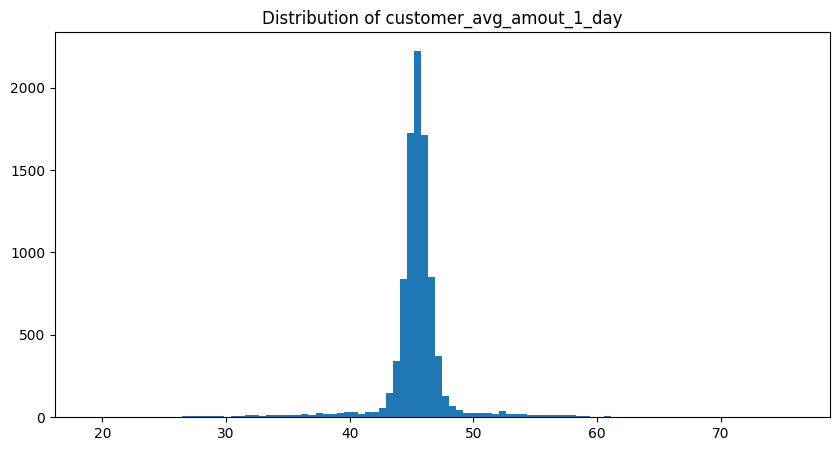

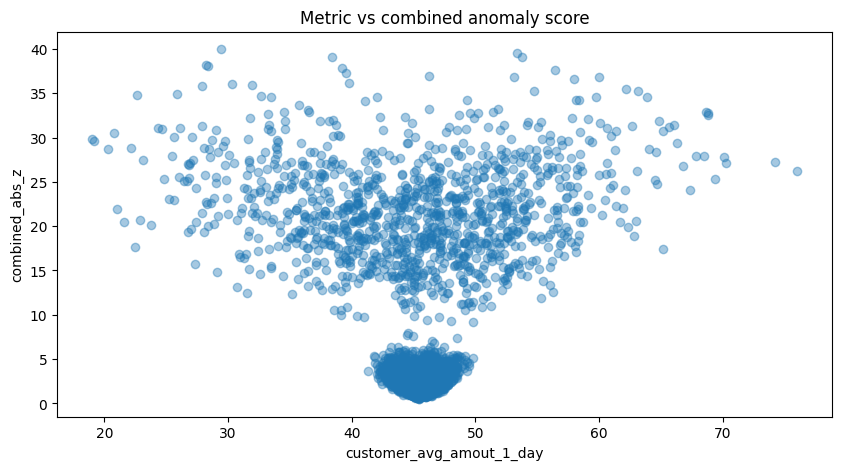

,name,customer_avg_amout_1_day,customer_avg_amout_1_day_z,abs_z
0,Willie Stein,75.990000,9.376263,9.376263
1,Ashley Campbell,74.231429,8.836376,8.836376
2,Stephen Owen,19.012222,-8.116111,8.116111
3,Cindy Bell,19.188889,-8.061874,8.061874
4,Travis Graham,20.312500,-7.716922,7.716922
5,Amber Irwin,70.250000,7.614063,7.614063
6,Timothy Bell,70.101667,7.568525,7.568525
7,Daniel Peterson,20.797500,-7.568025,7.568025
8,Shannon Mason,20.985385,-7.510344,7.510344
9,Kelly Price,69.373636,7.345017,7.345017


In [ ]:
# step 5  visualize

metric_to_plot = "customer_avg_amout_1_day"   # change to any metric in metric_cols

plt.figure()
plt.hist(df_all[metric_to_plot].dropna(), bins=100)
plt.title(f"Distribution of {metric_to_plot}")
plt.show()

# scatter of combined score vs metric
plt.figure()
plt.scatter(df_all[metric_to_plot], df_all['combined_abs_z'], alpha=0.4)
plt.xlabel(metric_to_plot)
plt.ylabel("combined_abs_z")
plt.title("Metric vs combined anomaly score")
plt.yscale('linear')
plt.show()

# show top flagged by this metric
display(per_field_anoms[metric_to_plot]['top_10'])


In [37]:
# step 6 (optional) customer name lookup
def inspect_name(name):
    row = df_all[df_all['name'] == name]
    if row.empty:
        print("Name not found:", name)
        return
    display(row.T)   # transpose to read easily
    # show which fields flagged
    flagged = []
    for m in metric_cols:
        z = float(row[f"{m}_z"].values[0])
        if abs(z) > z_threshold:
            flagged.append((m, z))
    print("Per-field flagged (|z| >", z_threshold, "):", flagged)
    print("Combined score:", float(row['combined_abs_z']))

# Example:
inspect_name("Anthony Chiam")    # change to the name you want to look into


Name not found: Anthony Chiam


In [ ]:
# step 7 export shortlisted anomalies for manual review (w/o any reason flagged)
SHORTLIST = RESULT_DIR / "shortlist_anomalies.csv"
shortlist = df_all[df_all['is_anomaly']].sort_values('combined_abs_z', ascending=False)
shortlist.to_csv(SHORTLIST, index=False)
print("Shortlist saved:", SHORTLIST, "count:", len(shortlist))
shortlist.head(5) #show only top 5


Shortlist saved: anomaly_results\shortlist_anomalies.csv count: 1173


,name,customer_avg_amout_1_day,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,...,merchant_num_trans_1_day_z,merchant_num_trans_7_day_z,merchant_num_trans_30_day_z,merchant_risk_1_day_z,merchant_risk_7_day_z,merchant_risk_30_day_z,merchant_risk_90_day_z,combined_abs_z,flag_per_field,flag_combined
9014,Justin Gates,29.424286,51.162857,31.685714,2589.715714,79041.971429,469447.537143,1.857143,4.714286,14.571429,...,0.221369,8.337041,-2.238977,-5.860280,-9.889976,-2.721060,-2.369942,39.981442,True,True
8430,Brooke Villanueva,53.374286,64.567143,45.498571,2950.881429,66050.484286,765116.254286,5.428571,8.857143,19.428571,...,2.277674,4.540532,5.503789,6.880993,-0.858660,5.732727,0.940838,39.487535,True,True
3637,Jerry Miller,53.780000,29.608571,42.507143,2403.282857,46223.201429,595276.664286,5.428571,13.285714,18.857143,...,-0.840091,-1.253604,1.056148,6.880993,8.795507,4.738164,4.933250,39.125648,True,True
8677,Mitchell Harrison,38.384286,39.691429,43.041429,1407.011429,61109.360000,681084.827143,3.000000,6.571429,13.142857,...,-6.512385,3.096585,3.303233,-1.783073,-5.841455,-5.207467,-6.167601,39.108868,True,True
8811,Margaret Sanchez,28.191000,41.566000,32.796000,1586.393000,70185.877000,443067.324000,5.400000,11.400000,18.100000,...,-5.491072,5.749020,-2.929804,6.779062,4.684701,3.420368,-1.376708,38.156378,True,True
9286,Brian Black,28.377143,54.845714,25.884286,2524.274286,53709.092857,676918.182857,5.285714,11.714286,19.714286,...,-0.151223,0.934002,3.194119,6.371342,5.369835,6.230009,3.569987,38.097364,True,True
8790,Jordan Martin,39.192857,48.322857,22.124286,2258.738571,28860.090000,523977.695714,1.571429,6.571429,12.714286,...,-1.663057,-6.327634,-0.810979,-6.879582,-5.841455,-5.953390,-1.980438,37.869323,True,True
8758,David Haynes,56.424000,52.031000,38.084000,1788.594000,76131.165000,229474.413000,4.500000,10.200000,14.500000,...,-4.339836,7.486414,-8.523226,3.568262,2.068733,-2.845380,2.235938,37.604212,True,True
9005,Gerald Blevins,39.565714,58.542857,21.550000,3772.074286,69282.254286,638039.048571,3.142857,8.571429,11.857143,...,6.953154,5.484954,2.175980,-1.273422,-1.481509,-7.445234,-0.617176,37.278525,True,True
9099,Nicole Oconnor,46.258750,34.138750,35.218750,2420.920000,32903.080000,685147.187500,2.250000,5.750000,12.500000,...,-0.739673,-5.146149,3.409615,-4.458740,-7.632147,-6.326351,-5.193843,36.976907,True,True


In [ ]:
#count tally (optional)
total_flagged = int(df_all['is_anomaly'].sum())
total_customers = len(df_all)
print(f"Flagged {total_flagged} out of {total_customers} customers ({total_flagged/total_customers:.2%})")


Flagged 1173 out of 9331 customers (12.57%)


6. This is full block of code for the same output, except this one adds in the reason being flagged 

In [ ]:
#1. check total flagged counts
total_flagged = int(df_all['is_anomaly'].sum())
total_customers = len(df_all)
print(f"Flagged {total_flagged} out of {total_customers} customers ({total_flagged/total_customers:.2%})")


#2. top flagged by combined score
top_flagged = df_all[df_all['is_anomaly']].sort_values('combined_abs_z', ascending=False)
top_flagged[['name','combined_abs_z','flag_per_field','flag_combined'] + metric_cols].head(30)


#3. create readable reasons for each flagged customer
z_threshold = 3.0   # same threshold you used
def get_reasons(row):
    reasons = []
    for m in metric_cols:
        zval = row.get(f"{m}_z", np.nan)
        if pd.notna(zval) and abs(zval) > z_threshold:
            reasons.append(f"{m}")
    if row.get('flag_combined', False):
        reasons.append("combined_score")
    return ";".join(reasons) if reasons else ""

df_all['flag_reasons'] = df_all.apply(get_reasons, axis=1)

#4. show flagged with reasons
flagged_with_reasons = df_all[df_all['is_anomaly']].sort_values('combined_abs_z', ascending=False)
flagged_with_reasons[['name','flag_reasons','combined_abs_z'] + metric_cols].head(50)

#5. explode reasons and count frequency
reason_series = flagged_with_reasons['flag_reasons'].str.split(';').explode().dropna()
reason_counts = reason_series.value_counts()
reason_counts

#6. Save the flagged shortlist with reasons
out_path = RESULT_DIR / "shortlist_with_reasons2.csv"
shortlist = flagged_with_reasons[['name','flag_reasons','combined_abs_z','flag_per_field','flag_combined'] + metric_cols + [f"{c}_z" for c in metric_cols]]
shortlist.to_csv(out_path, index=False)
print("Saved shortlist to", out_path, "count:", len(shortlist))
print("Total flagged customers:", len(shortlist))

#preview your sample shortlist
shortlist.head(30)

Flagged 1173 out of 9331 customers (12.57%)
Saved shortlist to anomaly_results\shortlist_with_reasons2.csv count: 1173
Total flagged customers: 1173


,name,flag_reasons,combined_abs_z,flag_per_field,flag_combined,customer_avg_amout_1_day,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,...,customer_avg_amout_1_day_z,customer_avg_amount_7_day_z,customer_avg_amount_30_day_z,merchant_num_trans_1_day_z,merchant_num_trans_7_day_z,merchant_num_trans_30_day_z,merchant_risk_1_day_z,merchant_risk_7_day_z,merchant_risk_30_day_z,merchant_risk_90_day_z
9014,Justin Gates,customer_avg_amout_1_day;merchant_num_trans_7_...,39.981442,True,True,29.424286,51.162857,31.685714,2589.715714,79041.971429,...,-4.919572,1.820030,-1.603195,0.221369,8.337041,-2.238977,-5.860280,-9.889976,-2.721060,-2.369942
8430,Brooke Villanueva,customer_avg_amount_7_day;customer_avg_amount_...,39.487535,True,True,53.374286,64.567143,45.498571,2950.881429,66050.484286,...,2.433161,6.160306,4.158855,2.277674,4.540532,5.503789,6.880993,-0.858660,5.732727,0.940838
3637,Jerry Miller,customer_avg_amount_7_day;merchant_risk_1_day;...,39.125648,True,True,53.780000,29.608571,42.507143,2403.282857,46223.201429,...,2.557717,-5.159198,2.910977,-0.840091,-1.253604,1.056148,6.880993,8.795507,4.738164,4.933250
8677,Mitchell Harrison,customer_avg_amount_30_day;merchant_num_trans_...,39.108868,True,True,38.384286,39.691429,43.041429,1407.011429,61109.360000,...,-2.168821,-1.894392,3.133855,-6.512385,3.096585,3.303233,-1.783073,-5.841455,-5.207467,-6.167601
8811,Margaret Sanchez,customer_avg_amout_1_day;merchant_num_trans_1_...,38.156378,True,True,28.191000,41.566000,32.796000,1586.393000,70185.877000,...,-5.298195,-1.287411,-1.140038,-5.491072,5.749020,-2.929804,6.779062,4.684701,3.420368,-1.376708
9286,Brian Black,customer_avg_amout_1_day;customer_avg_amount_7...,38.097364,True,True,28.377143,54.845714,25.884286,2524.274286,53709.092857,...,-5.241048,3.012530,-4.023268,-0.151223,0.934002,3.194119,6.371342,5.369835,6.230009,3.569987
8790,Jordan Martin,customer_avg_amount_30_day;merchant_num_trans_...,37.869323,True,True,39.192857,48.322857,22.124286,2258.738571,28860.090000,...,-1.920587,0.900444,-5.591757,-1.663057,-6.327634,-0.810979,-6.879582,-5.841455,-5.953390,-1.980438
8758,David Haynes,customer_avg_amout_1_day;merchant_num_trans_1_...,37.604212,True,True,56.424000,52.031000,38.084000,1788.594000,76131.165000,...,3.369434,2.101132,1.065858,-4.339836,7.486414,-8.523226,3.568262,2.068733,-2.845380,2.235938
9005,Gerald Blevins,customer_avg_amount_7_day;customer_avg_amount_...,37.278525,True,True,39.565714,58.542857,21.550000,3772.074286,69282.254286,...,-1.806118,4.209656,-5.831321,6.953154,5.484954,2.175980,-1.273422,-1.481509,-7.445234,-0.617176
9099,Nicole Oconnor,customer_avg_amount_7_day;merchant_num_trans_7...,36.976907,True,True,46.258750,34.138750,35.218750,2420.920000,32903.080000,...,0.248667,-3.692337,-0.129385,-0.739673,-5.146149,3.409615,-4.458740,-7.632147,-6.326351,-5.193843


6.1 visualise

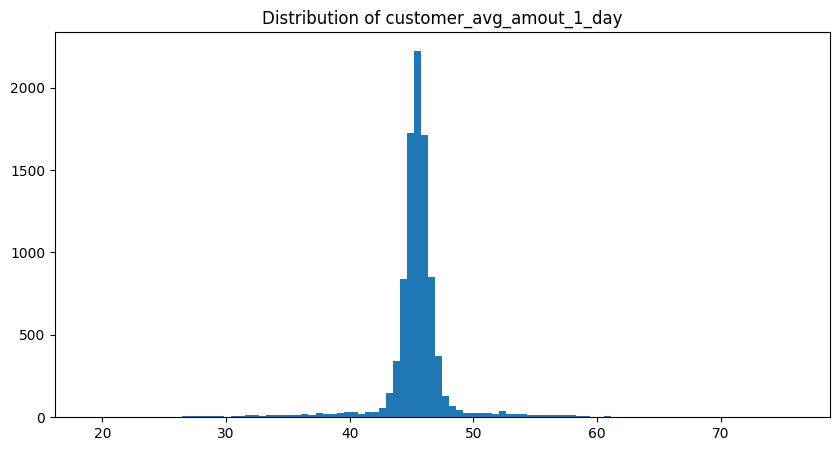

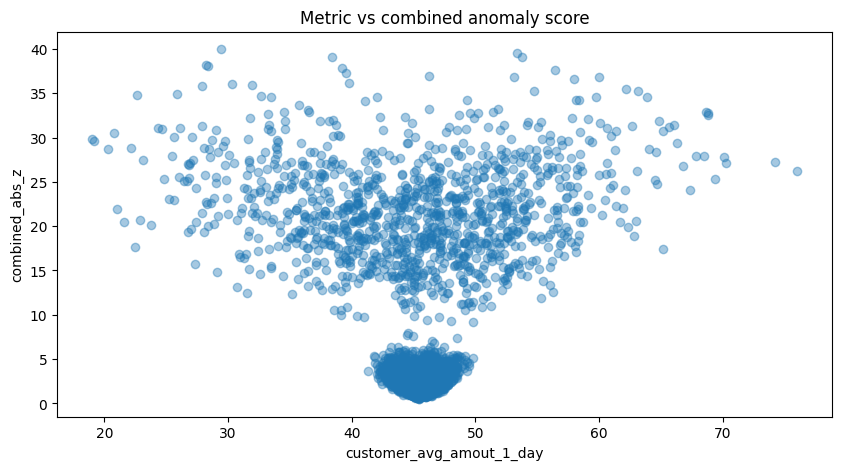

,name,customer_avg_amout_1_day,customer_avg_amout_1_day_z,abs_z
0,Willie Stein,75.990000,9.376263,9.376263
1,Ashley Campbell,74.231429,8.836376,8.836376
2,Stephen Owen,19.012222,-8.116111,8.116111
3,Cindy Bell,19.188889,-8.061874,8.061874
4,Travis Graham,20.312500,-7.716922,7.716922
5,Amber Irwin,70.250000,7.614063,7.614063
6,Timothy Bell,70.101667,7.568525,7.568525
7,Daniel Peterson,20.797500,-7.568025,7.568025
8,Shannon Mason,20.985385,-7.510344,7.510344
9,Kelly Price,69.373636,7.345017,7.345017


In [34]:
metric_to_plot = "customer_avg_amout_1_day"   # change to any metric in metric_cols

plt.figure()
plt.hist(df_all[metric_to_plot].dropna(), bins=100)
plt.title(f"Distribution of {metric_to_plot}")
plt.show()

# scatter of combined score vs metric
plt.figure()
plt.scatter(df_all[metric_to_plot], df_all['combined_abs_z'], alpha=0.4)
plt.xlabel(metric_to_plot)
plt.ylabel("combined_abs_z")
plt.title("Metric vs combined anomaly score")
plt.yscale('linear')
plt.show()

# show top flagged by this metric
display(per_field_anoms[metric_to_plot]['top_10'])